In [4]:
from scipy.io import wavfile
import noisereduce as nr
# load data
# perform noise reduction
import pandas as pd
delays = pd.read_parquet('/home/elamb/lsa_test/lumi-followup/examples/nx2pd/delays.parquet')
params = pd.read_parquet('/home/elamb/lsa_test/lumi-followup/examples/nx2pd/params.parquet')


In [5]:
def read_file(file_path, logger):
    """Loads data from file"""
    import numpy as np
    from pathlib import Path

    error_flag = False
    fid = open(file_path, 'r')
    if fid == -1:
        errstr = 'Cannot open the file: ' + file_path
        print(errstr)
        error_flag = True
    else:
        # Read header
        from_scope = {'delta_t_traces': '---', 'first_trigger': '---', 'tr_offset': []}
        for header_long, line in enumerate(fid):
            aux = line.split('* Date:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['date'] = aux

            aux = line.split('* Time:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['time'] = aux

            aux = line.split('* Time between traces:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                if aux == '---':
                    continue
                from_scope['delta_t_traces'] = int(aux[0])

            aux = line.split('* First trigger:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                if aux == '---':
                    continue
                from_scope['first_trigger'] = float(aux[0])

            aux = line.split('* Time interval per data point (sec):  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['delta_t_pts'] = float(aux)

            aux = line.split('* Horizontal fastframe length:  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['h_frame_length'] = int(aux)

            aux = line.split('* Number of frames:  ')
            if len(aux) != 1:
                aux = aux[1]
                n_frames = int(aux)
                from_scope['n_frames'] = n_frames

            aux = line.split('* Number of data points:  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['n_data_pts'] = int(aux)

            aux = line.split('* Acquire mode:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['acq_mode'] = aux

            aux = line.split('* Filter:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['filter'] = aux

            aux = line.split('* Trigger holdoff time:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['tr_hold_off'] = aux

            aux = line.split('* Vertical scale (V/div):  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['v_scale'] = float(aux)

            aux = line.split('* Vertical position (div):  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['v_pos'] = float(aux)

            aux = line.split('* Input coupling:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['in_coupl'] = aux

            aux = line.split('* Input impedance:  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.rstrip("\n")
                from_scope['in_imp'] = aux

            aux = line.split('* Vertical bandwidth:  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['v_bandwidth'] = float(aux)

            aux = line.split('* Scale Factor (dB):  ')
            if len(aux) != 1:
                aux = aux[1]
                from_scope['att_db'] = float(aux)

            aux = line.split('* Trigger offset (index sec):  ')
            if len(aux) != 1:
                aux = aux[1]
                aux = aux.split()
                from_scope['tr_offset'].append(float(aux[1]))
                header_end = header_long
                if len(from_scope['tr_offset']) == from_scope['n_frames']:
                    break
        fid.close()
        from_scope['tr_offset'] = np.array(from_scope['tr_offset'])

        # Read both numpy and ascii files
        if Path(file_path[:-3] + 'npy').exists():
            data = np.load(file_path[:-3] + 'npy')
        else:
            data = pd.read_csv(file_path, skiprows=header_end + 2, header=None)
            # This is for some old files where the zeros were not loaded properly
            data.replace({'0.000E+': '0'}, inplace=True)
            data = data.iloc[:, 0].astype(float)
            data = data.to_numpy()

        from_scope['acquired'] = np.reshape(data, (int(from_scope['h_frame_length']),
                                                    int(from_scope['n_frames'])), order='F')

        #if not error_flag:
        #    from_scope = Acquisition.add_timescale(from_scope, logger)

    return from_scope


from matplotlib import pyplot as plt




In [6]:
reduced_noise = nr.reduce_noise(y=data, sr=60000)

plt.plot(aux['acquired'][:,0])
plt.plot(reduced_noise)


NameError: name 'data' is not defined

In [ ]:
delays.value

0        99
1      1299
2      1099
3      5299
4      8934
5      5334
6        99
7      2099
8      1099
9      5099
10     5334
11    22099
12     1399
13       99
14     1399
15     1299
16     1199
17     5359
18       99
Name: value, dtype: int32

In [ ]:
import numpy as np 


x = pd.DataFrame.from_dict(params.value)['value']

In [ ]:
import datetime 
timestamp = (delays.__record_timestamp__[17])

dt_object = datetime.datetime.fromtimestamp(timestamp/1e9, )
dt_object


datetime.datetime(2022, 11, 2, 16, 10, 34, 362000)

In [ ]:
delays.shape()

TypeError: 'tuple' object is not callable

### Scraping of tails, longitudinal profiles in the SPS

- The scraping was put atr 1700ms (cycle time) after injection , 400ms lag 
- Acquisition of longitudinal data 

- The last acquisition where done 5 seconds after the injection for a total of 6500 frames acquired every 5 turns
- each point is 2.5e-11s apart 
- 17.30 only one batch - does it start again? 
- pc = 25.92 GeV at injection 
- intensity 1.6e11 p/b 

- file for plotting BWS the wirescanners 



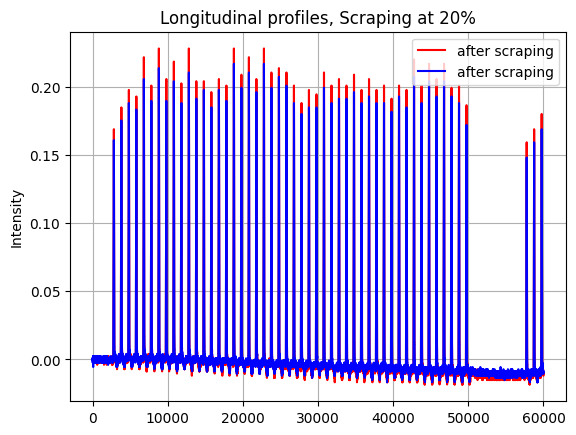

In [7]:
aux=read_file('MD_133.asc', 'MD_133.npy')

plt.plot(aux['acquired'][:,0], c='r', label='after scraping')

plt.plot(aux['acquired'][:,5300], c='b', label='after scraping')
plt.grid()
plt.ylabel('Intensity')
plt.title('Longitudinal profiles, Scraping at 20%')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


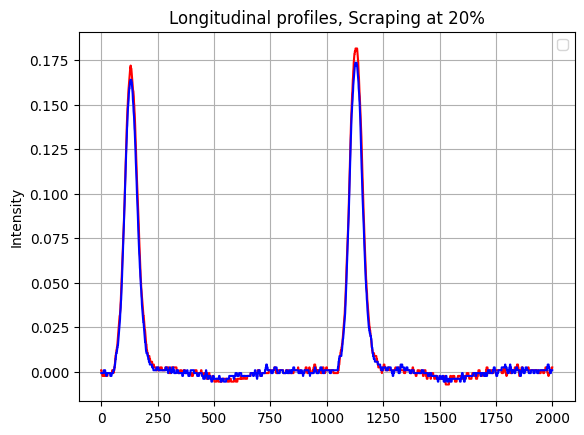

In [13]:
m = 100
n = 5200
l = 2700

#aux=read_file('MD_133.asc', 'MD_133.npy')
for i in range(m, m+100,100):
    plt.plot(aux['acquired'][l:l+2000,i], c='r')

for i in range(n,n+100,100):
    plt.plot(aux['acquired'][l:l+2000,i], c='b')

plt.grid()
plt.ylabel('Intensity')
plt.title('Longitudinal profiles, Scraping at 20%')
plt.legend()


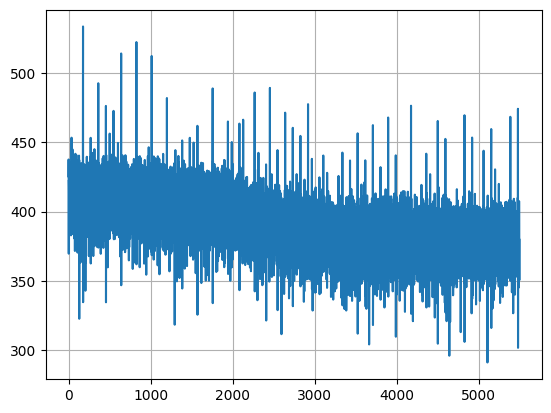

In [14]:
# calulcate totail intensity over time ... 
import scipy as sp
from scipy.integrate import trapz
aux33=read_file('MD_133.asc', 'MD_133.npy')
aux35=read_file('MD_135.asc', 'MD_135.npy')

total_intensity = []
for i in range(aux33['n_frames']):
    total_intensity.append(trapz(aux['acquired'][:,i]))
plt.plot(total_intensity)
plt.grid()

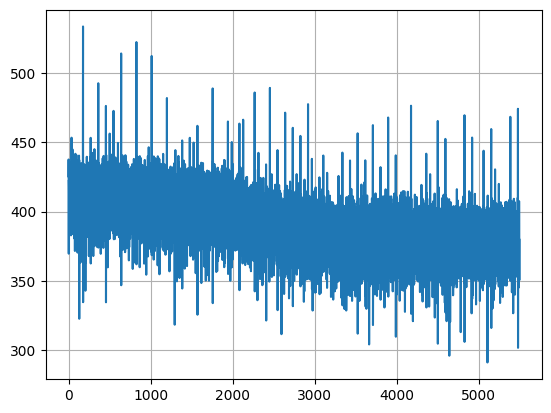

In [15]:


total_intensity = []
for i in range(aux35['n_frames']):
    total_intensity.append(trapz(aux['acquired'][:,i]))
plt.plot(total_intensity)
plt.grid()

In [11]:
# for each frame bunch by bunch calculate the integrated intensity, as it evolves.. or could be the total intensity inside 
aux=read_file('MD_135.asc', 'MD_135.npy')


aux



# BCT shows 1e13/1e12 protons maximum. 



{'delta_t_traces': '---',
 'first_trigger': '---',
 'tr_offset': array([6.1963e-12, 1.3946e-11, 3.4463e-12, ..., 1.4196e-11, 1.8196e-11,
        2.0696e-11]),
 'date': '2022-11-02',
 'time': '16:34:20',
 'delta_t_pts': 2.5e-11,
 'h_frame_length': 60000,
 'n_frames': 5500,
 'n_data_pts': 330000000,
 'acq_mode': 'SAMPLE',
 'filter': 'SINX',
 'tr_hold_off': 'RANDOM;250.0000E-9',
 'v_scale': 0.04,
 'v_pos': -4.5,
 'in_coupl': 'DC',
 'in_imp': '50.0000',
 'v_bandwidth': 2500000000.0,
 'att_db': 0.0,
 'acquired': array([[-0.0008,  0.0024, -0.0008, ..., -0.0008,  0.0008, -0.0008],
        [-0.0008,  0.0024, -0.0008, ..., -0.0008, -0.0008,  0.0008],
        [-0.0008,  0.0024, -0.0008, ..., -0.0008, -0.0008,  0.0008],
        ...,
        [-0.0088, -0.0104, -0.0088, ..., -0.0104, -0.0104, -0.012 ],
        [-0.0104, -0.0104, -0.0088, ..., -0.0104, -0.012 , -0.012 ],
        [-0.0104, -0.0088, -0.0088, ..., -0.0104, -0.012 , -0.0104]])}

In [12]:
params.head()


,__record_timestamp__,__record_version__,context,context_family,context_id,parameter,parameter_id,partition,trim_id,value,nxcals_entity_id
0,1667386399868000000,1,LHC_BCMS_Q20_2022_V2,CYCLE,22182,ScopeTriggerE/NormalMode#paramTable,2019672,partition,123589290,"{'dimensions': [4, 64], 'elements': [44, 0, 0,...",55335337
1,1667386580334000000,1,LHC_BCMS_Q20_2022_V2,CYCLE,22182,ScopeTriggerE/NormalMode#paramTable,2019672,partition,123589372,"{'dimensions': [4, 64], 'elements': [44, 0, 0,...",55335337
2,1667394600571000000,1,LHC_BCMS_Q20_2022_V2,CYCLE,22182,ScopeTriggerE/NormalMode#paramTable,2019672,partition,123594157,"{'dimensions': [4, 64], 'elements': [44, 0, 0,...",55335337
3,1667397693128000000,1,LHC_BCMS_Q20_2022_V2,CYCLE,22182,ScopeTriggerE/NormalMode#paramTable,2019672,partition,123595880,"{'dimensions': [4, 64], 'elements': [44, 0, 0,...",55335337
4,1667397812552000000,1,LHC_BCMS_Q20_2022_V2,CYCLE,22182,ScopeTriggerE/NormalMode#paramTable,2019672,partition,123596005,"{'dimensions': [4, 64], 'elements': [44, 0, 0,...",55335337
